In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters
from scipy.interpolate import interp1d
from sklearn.decomposition import PCA
import copy

sigma = np.sqrt(7/2)
n = 101
n_comp = 21

'''def window(x,r = 40,c = 50):
    for i in range(n):
        for j in range(n):
            if (i-c)**2+(j-c)**2 > 30*30:
                x[i,j] =0'''
                
def window(x,r = 40,c = 50):
    for i in range(n):
        for j in range(n):
            r2 = (i-c)**2+(j-c)**2
            if r2 <= 40*40:
                x[i,j] = x[i,j]*np.sqrt(1 - r2/1600)
            else:
                x[i,j] = 0
    return copy.deepcopy(x)

#wsr = np.loadtxt("wsr.dat").T

#f = interp1d(wsr[0],wsr[1],kind="cubic")

grid_y1, grid_x1 = np.meshgrid(range(101), range(101))

grid_y1 -= 50
grid_y1 = grid_y1*0.2
grid_x1 -= 50
grid_x1 = grid_x1*0.2

#win = np.sqrt(grid_y1**2+grid_x1**2)

#win = f(win)


xs = []
wm = lap_weight(sigma=1.8)
for i in range(40000):
    np.random.seed()
    x = np.random.normal(0,sigma,size = (n,n))
    x = window(x)
    #x = filters.gaussian_laplace(x,sigma = 4)
    x = filters.convolve(x, weights=wm, mode="constant", cval=0.0)
    xs.append(x.reshape(n*n))


In [65]:
def lap_weight(sigma=4):
    w = np.zeros((21,21))
    for i in range(21):
        for j in range(21):
            w[i][j] = np.e**(-np.sqrt((i-10)**2+(j-10)**2)/sigma)
    w = w/np.sum(np.sum(w,axis=0),axis=0)
    return w

In [66]:
len(xs)

pca = PCA(n_components=n_comp)
pca.fit(xs)

ratio = pca.explained_variance_ratio_
comp = pca.components_

#np.save("comp.npz",comp)
#np.save("ratio.npz",ratio)

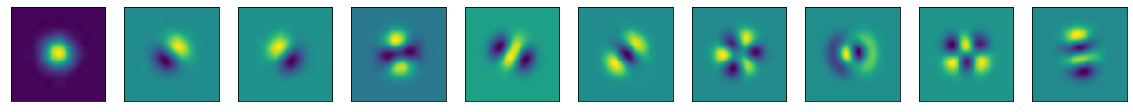

In [67]:
plt.figure(figsize=(20,20))
modes = comp.reshape(n_comp,101,101)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(modes[i])
#plt.show()
np.save('./results/fine_pca_comp.npy', modes)
#plt.savefig("./fig/fine_pca_comp.pdf", bbox_inches="tight")

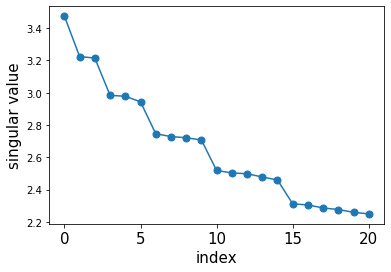

In [68]:
x = pca.singular_values_
plt.plot(np.arange(21), x/100, markersize=7, marker="o")
plt.xticks([0,5,10,15,20],fontsize=15)
#plt.yticks([1.0,1.2,1.4,1.6,1.8],fontsize=15)
plt.xlabel("index", fontsize=15)
plt.ylabel("singular value", fontsize=15)
np.save('./results/fine_pca_sv.npy', x)
#plt.savefig("./fig/fine_pca_sv.pdf", bbox_inches="tight")

In [69]:
# corase grid
xs = np.array(xs)

In [95]:
x1 = xs.reshape(-1,101,101)[:1000,50,50]
x2 = xs.reshape(-1,101,101)[:1000,50,51]

In [97]:
-1/(np.log(np.mean(x1*x2)/(np.std(x1)*np.std(x2)))*2)

10.377523171320382

In [70]:
coarse_xs = xs.reshape(-1,101,101)[:,::10,::10].reshape(40000,121)[:1000]

In [71]:
pca2 = PCA(n_components=n_comp)
pca2.fit(coarse_xs)

sv = pca2.singular_values_
comp = pca2.components_

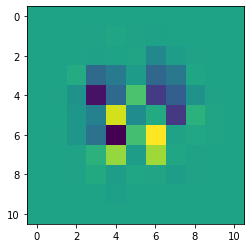

In [72]:
plt.imshow(comp[9].reshape(11,11))

In [73]:
from scipy.interpolate import interp2d

interp_comp = []
for i in range(10):
    x = np.arange(0,101,10)
    y = np.arange(0,101,10)
    z = comp[i].reshape(11,11)
    f = interp2d(x,y,z)
    x1 = np.arange(0,101)
    y1 = np.arange(0,101)
    z1 = f(x1,y1)
    interp_comp.append(z1)

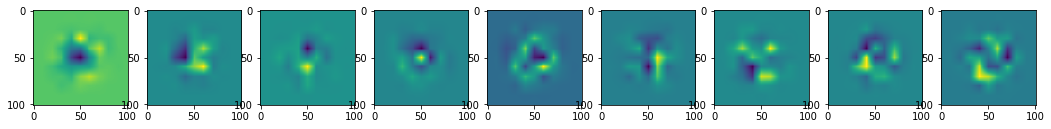

In [74]:
plt.figure(figsize=(20,20))
for i in range(i):
    plt.subplot(1,10,i+1)
    plt.imshow(interp_comp[i])

In [75]:
np.save('./results/coarse_pca_comp.npy', interp_comp)
np.save('./results/coarse_pca_sv.npy', sv)